# Recording a Gesture for Shimi

First, run the cell below to instatiate the shimi object. It should move to its initial positions and then relax.

**There's currently an issue where every other time the pypot motor library is run it crashes. Re-run the cell in this case.**

In [1]:
# Import some matplolib shortcuts for Jupyter notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from shimi import *
from motion.move import *
from motion.recorder import *
from audio.audio import *
import time
import datetime

from copy import deepcopy

import os

import threading

# Load Shimi model. Contains motor definitions and angle limits.
# shimi = Shimi('config/shimi_robot_model.json')

# Load Shimi
shimi = Shimi()

local_gestures = {}

Connecting on /dev/tty.usbserial-AL03EM2N
Found motors with the following IDs: [1, 2, 3, 4, 5]
(OrderedDict([('model', 'MX-28'),
              ('firmware', 30),
              ('id', 1),
              ('baudrate', 1),
              ('return delay time', 0),
              ('angle limit', (-99.03, 14.64)),
              ('highest temperature limit', 80.0),
              ('voltage limit', (6.0, 16.0)),
              ('max torque', 100.0),
              ('status return level', 'always'),
              ('alarm LED', ('Overload Error', 'Overheating Error')),
              ('alarm shutdown', ('Overload Error', 'Overheating Error')),
              ('torque_enable', True),
              ('LED', False),
              ('pid gain', (0.0, 0.0, 4.0)),
              ('goal position', -16.13),
              ('moving speed', 0.0),
              ('torque limit', 100.0),
              ('present position', -19.03),
              ('present speed', 0.0),
              ('present load', -24.2),
              (

Here are some helper functions.

In [13]:
# Puts shimi in a neutral position with motors non-compliant
shimi.initial_position()

Setting motors to starting positions:
{1: 10.0, 2: -21.6, 3: 0.0, 4: -11.85, 5: 5.41}


## **Make sure Shimi will not collapse before you run this!!!**

In [5]:
# Makes the motors compliant
shimi.disable_torque()

In [ ]:
m = LinearAccelMove(shimi, shimi.neck_lr, -100, 1.0)
m.add_move(60, 1.5)
m.add_move(-10, 0.7)
m1 = LinearAccelMove(shimi, shimi.neck_ud, -50, 1.0)
m1.add_move(0, 1.5)
m1.add_move(10, 0.7)
m.start()
m1.start()
m.join()
m1.join()
print("done")

In [ ]:
m = LinearMove(shimi, shimi.neck_lr, -100, 1.0)
m.add_move(60, 1.5)
m.add_move(-10, 0.7)
m1 = LinearMove(shimi, shimi.neck_ud, -50, 1.0)
m1.add_move(0, 1.5)
m1.add_move(10, 0.7)
m.start()
m1.start()
m.join()
m1.join()
print("done")

In [2]:
r = Recorder(shimi, shimi.all_motors, 5.0)

3.0...
2.0...
1.0...
Recording...
Done. Recorded 33 positions and 33 velocities.


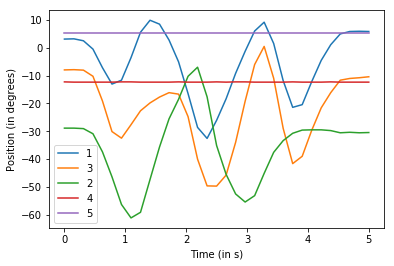

In [10]:
r.record()
r.plot(plt.axes())

In [12]:
r.play()

[[[0.4, 1.0, 1.5999999999999999, 2.6, 3.600000000000001, 4.200000000000001], [3.0335377231783096, -13.040477094168583, 8.857951901350788, -32.44929725813809, 7.096969080443946, -20.2013396486578]], [[1.2, 1.9999999999999998, 2.6, 3.600000000000001, 4.000000000000001], [-31.23349311863022, -16.26932566051588, -49.63148557220753, -2.6472344327484554, -38.81677559159887]], [[0.4, 1.4, 2.4, 3.2000000000000006, 4.400000000000001, 4.800000000000002], [-28.922855124370983, -60.111675613068854, -7.74946260656575, -54.76913534686286, -29.49, -30.378652250069386]], [[1.2, 1.7999999999999998, 2.1999999999999997, 2.4, 2.8000000000000003, 3.0000000000000004, 3.2000000000000006, 3.800000000000001, 4.000000000000001, 4.400000000000001, 4.600000000000001], [-12.26, -12.35, -12.30641177394152, -12.35, -12.284226160448323, -12.303112932052635, -12.26, -12.35, -12.27999922565214, -12.35, -12.302138929399028]], [[], []]]
No positions for motor 5
Setting positions {1: 3.0335377231783096, 3: -31.23349311863

In [ ]:
print(r.motors)
print(r.positions[-1])

In [ ]:
m = LinearMove(shimi, shimi.neck_lr, -90, 0.2)
m.start()

## Note to self
* Chaining multiple move changes in one Move thread
* Record position direction changes, record velocities

In [8]:
play_outkast(shimi)

Setting motors to starting positions:
{1: 10.0, 2: -21.6, 3: 0.0, 4: -11.85, 5: 5.41}
